In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
july = pd.read_csv("./Sales_July_2019.csv")
august = pd.read_csv("./Sales_August_2019.csv")
sept = pd.read_csv("./Sales_September_2019.csv")

In [38]:
q3 = pd.concat([july,august,sept],axis=0)
q3_copy = q3.copy(deep=True)

<AxesSubplot:>

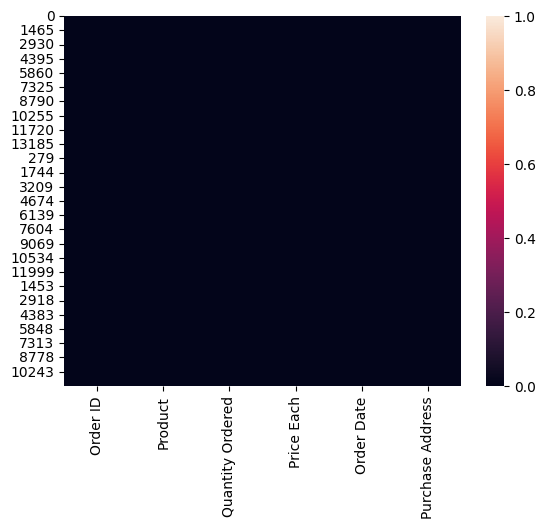

In [39]:
sns.heatmap(data=pd.isnull(q3))

In [40]:
#quarter3.isna().mean().sort_values(ascending=False).round(4)
q3.dropna(axis=0,how='any',inplace=True)
q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37955 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          37955 non-null  object
 1   Product           37955 non-null  object
 2   Quantity Ordered  37955 non-null  object
 3   Price Each        37955 non-null  object
 4   Order Date        37955 non-null  object
 5   Purchase Address  37955 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [41]:
q3.drop_duplicates(keep='first')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [42]:
q3 = q3[q3['Quantity Ordered'] != 'Quantity Ordered']
q3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [43]:
#Which City had the highest number of sales?
q3['City'] = q3['Purchase Address'].str.split(", ",expand=True)[1]
q3['State'] = q3['Purchase Address'].str.split(", ",expand=True)[2].str.split(" ", expand=True)[0]
q3


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",Atlanta,GA
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",Seattle,WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",Atlanta,GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",Atlanta,GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",Seattle,WA
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Los Angeles,CA
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,CA
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",San Francisco,CA
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",San Francisco,CA


In [44]:
#Create month, year, time column
q3['month'] = q3['Order Date'].str[0:2]
q3['year'] = q3['Order Date'].str[6:8]
q3['time'] = q3['Order Date'].str[-6:-3]
q3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,month,year,time
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",Atlanta,GA,07,19,16
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",Seattle,WA,07,19,08
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",Atlanta,GA,07,19,12
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",Atlanta,GA,07,19,10
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",Seattle,WA,07,19,02
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Los Angeles,CA,09,19,20
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,CA,09,19,16
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",San Francisco,CA,09,19,07
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",San Francisco,CA,09,19,17


In [46]:
q3 = q3[q3['month'] != 10]
q3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,month,year,time,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",Atlanta,GA,07,19,16,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",Seattle,WA,07,19,08,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",Atlanta,GA,07,19,12,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",Atlanta,GA,07,19,10,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",Seattle,WA,07,19,02,14.95
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Los Angeles,CA,09,19,20,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,CA,09,19,16,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",San Francisco,CA,09,19,07,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",San Francisco,CA,09,19,17,379.99


In [47]:
#change columns types
q3['Quantity Ordered'] = pd.to_numeric(q3['Quantity Ordered'])
q3['Price Each'] = pd.to_numeric(q3['Price Each'])
q3['month'] = pd.to_numeric(q3['month'])
q3['year'] = pd.to_numeric(q3['year'])
q3['time'] = pd.to_numeric(q3['time'])
q3['Order Date'] = pd.to_datetime(q3['Order Date'])
q3['Sales'] = q3['Quantity Ordered'] * q3['Price Each']
q3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,month,year,time,Sales
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",Atlanta,GA,7,19,16,150.00
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",Seattle,WA,7,19,8,300.00
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",Atlanta,GA,7,19,12,3.84
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",Atlanta,GA,7,19,10,3.84
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",Seattle,WA,7,19,2,14.95
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles,CA,9,19,20,8.97
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,CA,9,19,16,700.00
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco,CA,9,19,7,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco,CA,9,19,17,379.99


In [48]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37877 entries, 0 to 11685
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          37877 non-null  object        
 1   Product           37877 non-null  object        
 2   Quantity Ordered  37877 non-null  int64         
 3   Price Each        37877 non-null  float64       
 4   Order Date        37877 non-null  datetime64[ns]
 5   Purchase Address  37877 non-null  object        
 6   City              37877 non-null  object        
 7   State             37877 non-null  object        
 8   month             37877 non-null  int64         
 9   year              37877 non-null  int64         
 10  time              37877 non-null  int64         
 11  Sales             37877 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 3.8+ MB


Number of products sold in each month

In [88]:
product_count = q3.groupby('month').count()[['Product']]
product_count

,Product
month,
7,14275
8,11961
9,11621
10,20


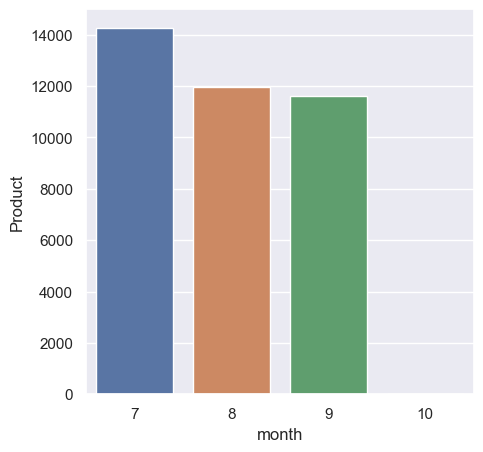

In [89]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(
    data=product_count.reset_index(),
    x = 'month',
    y = 'Product'
)
plt.show()

Sales by month

In [57]:
price_count = q3.groupby('month').sum()[['Quantity Ordered','Sales']]
price_count

,Quantity Ordered,Sales
month,,
7,16051,2644747.38
8,13448,2244467.88
9,13109,2097560.13
10,22,3353.31


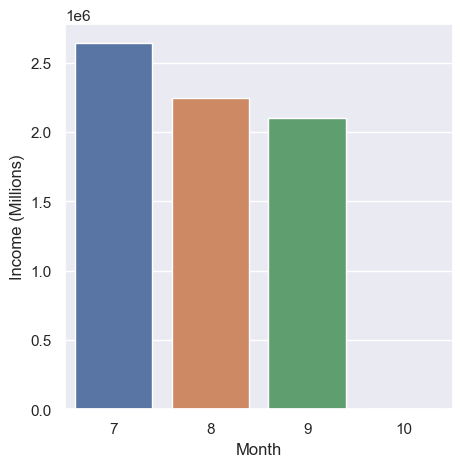

In [91]:
ax = sns.barplot(
    data = price_count.reset_index(),
    x = 'month',
    y = 'Sales'
)
ax.set(xlabel='Month', ylabel='Income (Millions)')
plt.show()

Prices Of the different products

In [59]:
product_price = q3[['Product','Price Each']].drop_duplicates(subset=['Product','Price Each'])
product_price

,Product,Price Each
0,Apple Airpods Headphones,150.00
1,Flatscreen TV,300.00
2,AA Batteries (4-pack),3.84
4,AAA Batteries (4-pack),2.99
5,Bose SoundSport Headphones,99.99
6,Google Phone,600.00
7,LG Dryer,600.00
8,USB-C Charging Cable,11.95
9,Lightning Charging Cable,14.95
12,34in Ultrawide Monitor,379.99


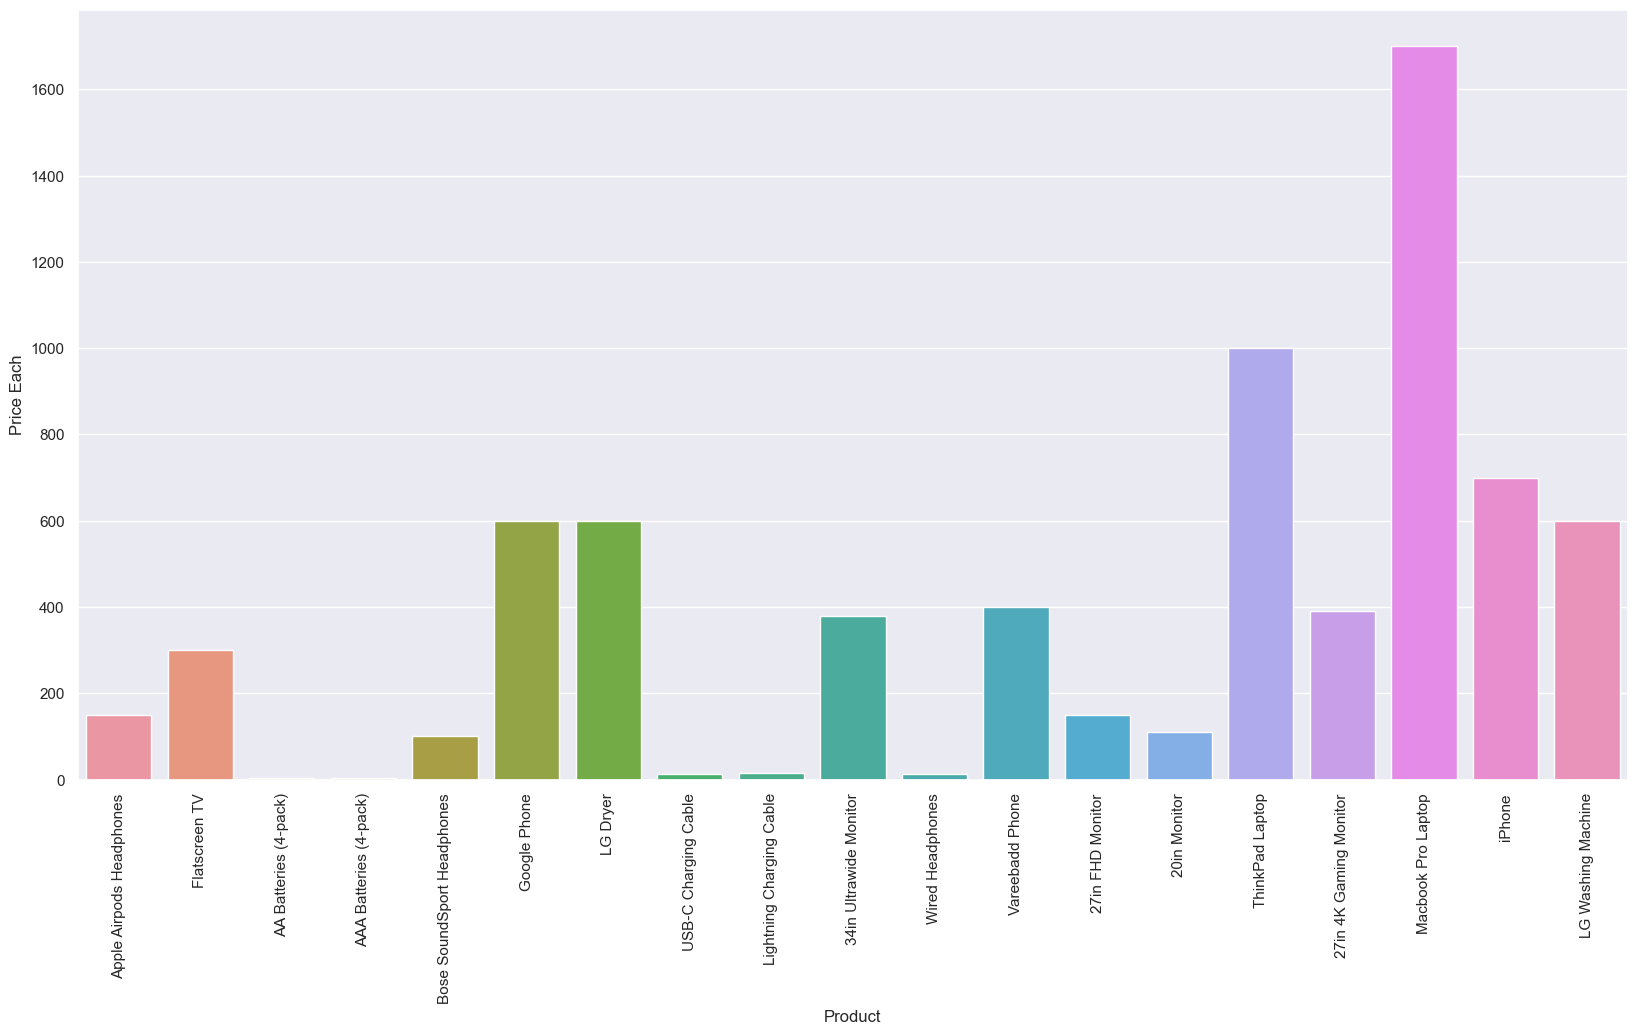

In [69]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(
    data=product_price,
    x = 'Product',
    y = 'Price Each'
)
plt.xticks(rotation=90)
plt.show()

Number of products sold for each item

In [74]:
prod_count= q3.groupby("Product").count()[['Order ID']].rename(columns={'Order ID':"Count"})
prod_count

,Count
Product,
20in Monitor,857
27in 4K Gaming Monitor,1301
27in FHD Monitor,1566
34in Ultrawide Monitor,1218
AA Batteries (4-pack),4229
AAA Batteries (4-pack),4183
Apple Airpods Headphones,3177
Bose SoundSport Headphones,2748
Flatscreen TV,1018


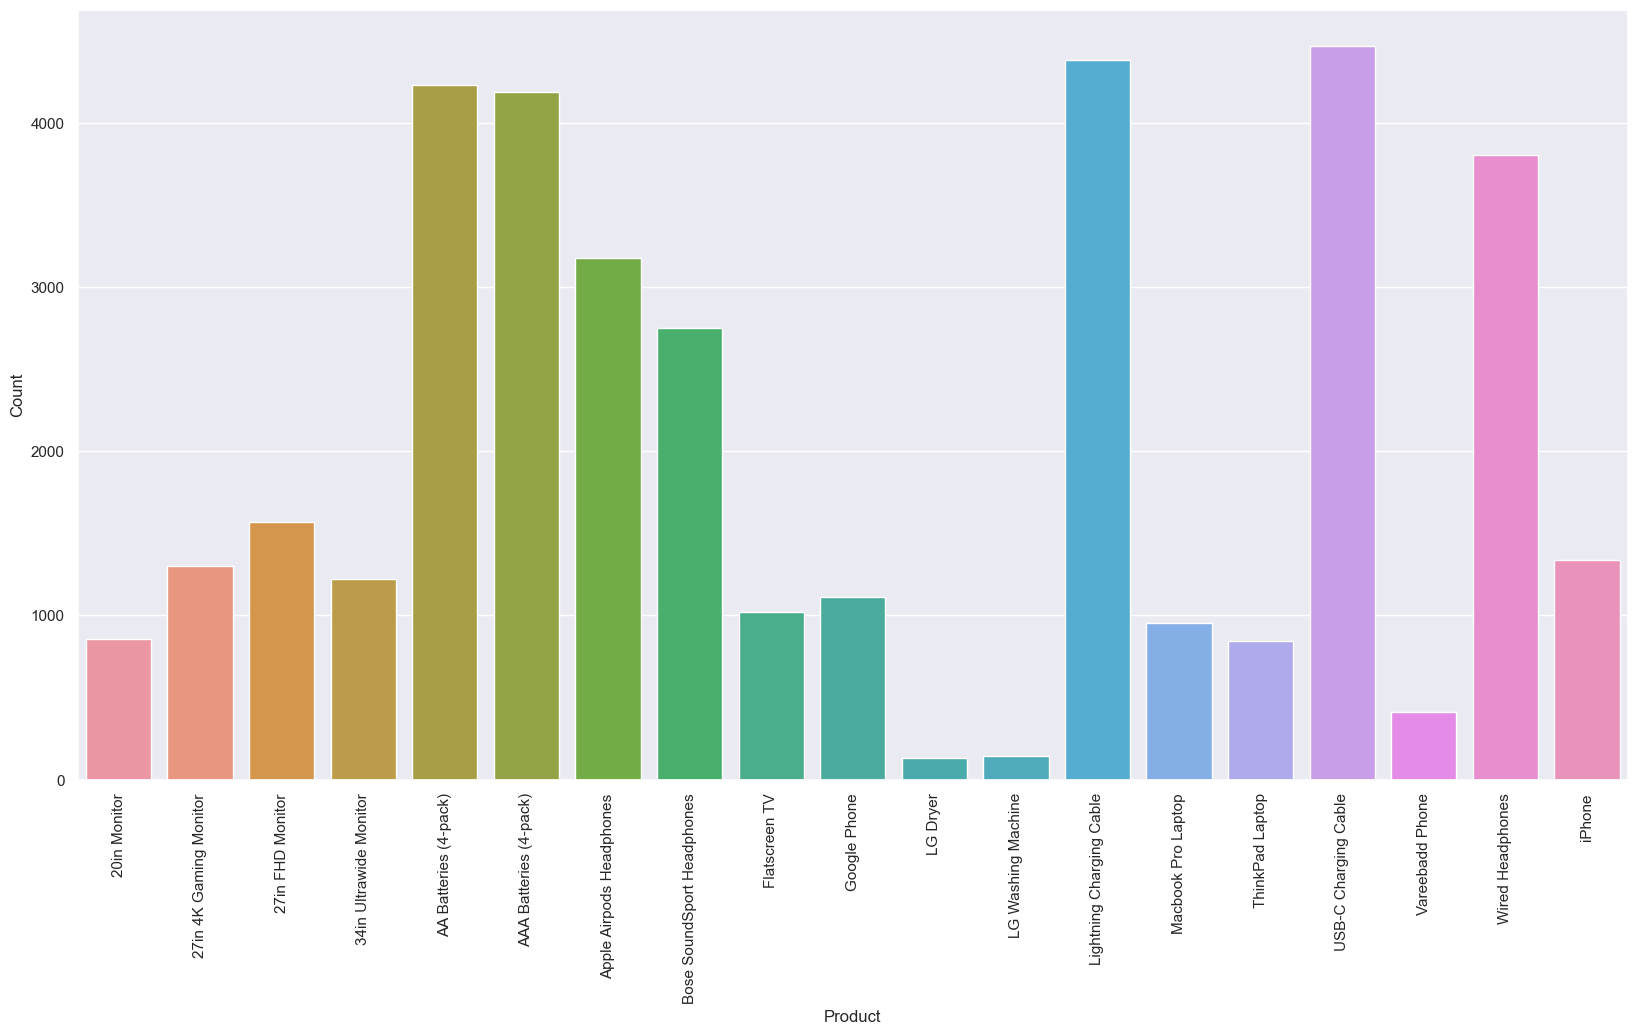

In [75]:
sns.barplot(
    data= prod_count.reset_index(),
    x = 'Product',
    y = 'Count'
)
plt.xticks(rotation=90)
plt.show()

What was the best month for sales? How much was earned that month?

Sales of each product by city

In [78]:
sales_by_city = q3.groupby(['City','Product']).count()
sales_by_city

Order ID  Quantity Ordered  Price Each  \
City    Product                                                          
Atlanta 20in Monitor                  79                79          79   
        27in 4K Gaming Monitor       119               119         119   
        27in FHD Monitor             123               123         123   
        34in Ultrawide Monitor        91                91          91   
        AA Batteries (4-pack)        361               361         361   
...                                  ...               ...         ...   
Seattle ThinkPad Laptop               61                61          61   
        USB-C Charging Cable         344               344         344   
        Vareebadd Phone               43                43          43   
        Wired Headphones             320               320         320   
        iPhone                        98                98          98   

                                Order Date  Purchase Address  State  month  \
City    Product                                                              
Atlanta 20in Monitor                    79                79     79     79   
        27in 4K Gaming Monitor         119               119    119    119   
        27in FHD Monitor               123               123    123    123   
        34in Ultrawide Monitor          91                91     91     91   
        AA Batteries (4-pack)          361               361    361    361   
...                                    ...               ...    ...    ...   
Seattle ThinkPad Laptop                 61                61     61     61   
        USB-C Charging Cable           344               344    344    344   
        Vareebadd Phone                 43                43     43     43   
        Wired Headphones               320               320    320    320   
        iPhone                          98                98     98     98   

                                year  time  Sales  
City    Product                                    
Atlanta 20in Monitor              79    79     79  
        27in 4K Gaming Monitor   119   119    119  
        27in FHD Monitor         123   123    123  
        34in Ultrawide Monitor    91    91     91  
        AA Batteries (4-pack)    361   361    361  
...                              ...   ...    ...  
Seattle ThinkPad Laptop           61    61     61  
        USB-C Charging Cable     344   344    344  
        Vareebadd Phone           43    43     43  
        Wired Headphones         320   320    320  
        iPhone                    98    98     98  

[171 rows x 10 columns]

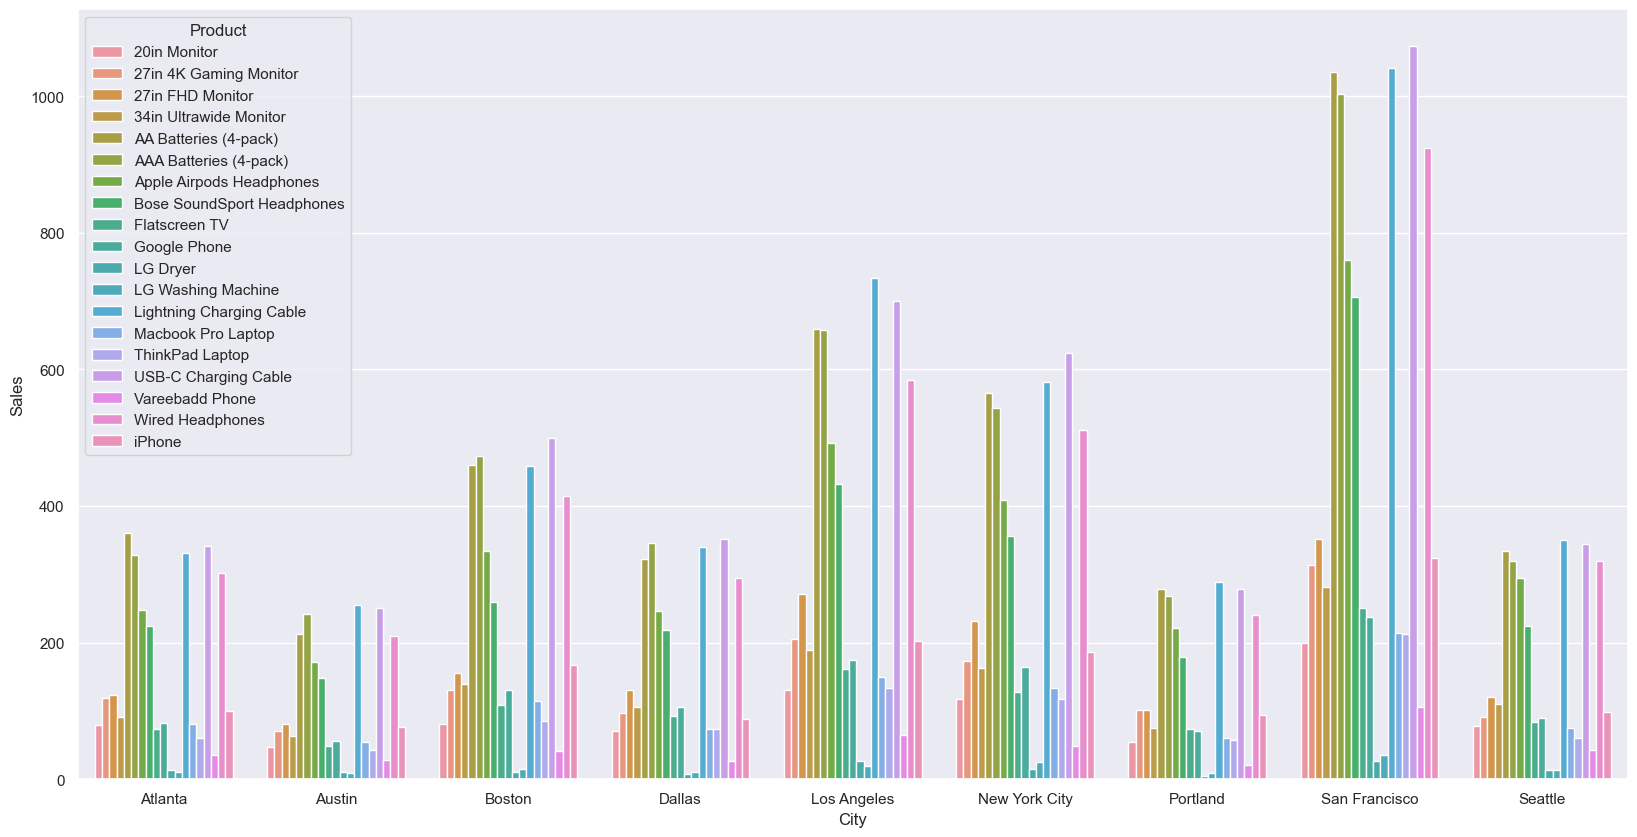

In [80]:
ax = sns.barplot(
    data=sales_by_city.reset_index(),
    x = 'City',
    y = 'Order ID',
    hue = 'Product'
)
ax.set(xlabel='City', ylabel='Sales')
plt.show()

Sales of each product by state

In [83]:
sales_by_state = q3.groupby(['State','Product']).count()
sales_by_state

Order ID  Quantity Ordered  Price Each  \
State Product                                                          
CA    20in Monitor                 330               330         330   
      27in 4K Gaming Monitor       518               518         518   
      27in FHD Monitor             623               623         623   
      34in Ultrawide Monitor       471               471         471   
      AA Batteries (4-pack)       1695              1695        1695   
...                                ...               ...         ...   
WA    ThinkPad Laptop               61                61          61   
      USB-C Charging Cable         344               344         344   
      Vareebadd Phone               43                43          43   
      Wired Headphones             320               320         320   
      iPhone                        98                98          98   

                              Order Date  Purchase Address  City  month  year  \
State Product                                                                   
CA    20in Monitor                   330               330   330    330   330   
      27in 4K Gaming Monitor         518               518   518    518   518   
      27in FHD Monitor               623               623   623    623   623   
      34in Ultrawide Monitor         471               471   471    471   471   
      AA Batteries (4-pack)         1695              1695  1695   1695  1695   
...                                  ...               ...   ...    ...   ...   
WA    ThinkPad Laptop                 61                61    61     61    61   
      USB-C Charging Cable           344               344   344    344   344   
      Vareebadd Phone                 43                43    43     43    43   
      Wired Headphones               320               320   320    320   320   
      iPhone                          98                98    98     98    98   

                              time  Sales  
State Product                              
CA    20in Monitor             330    330  
      27in 4K Gaming Monitor   518    518  
      27in FHD Monitor         623    623  
      34in Ultrawide Monitor   471    471  
      AA Batteries (4-pack)   1695   1695  
...                            ...    ...  
WA    ThinkPad Laptop           61     61  
      USB-C Charging Cable     344    344  
      Vareebadd Phone           43     43  
      Wired Headphones         320    320  
      iPhone                    98     98  

[151 rows x 10 columns]

<AxesSubplot:xlabel='State', ylabel='Order ID'>

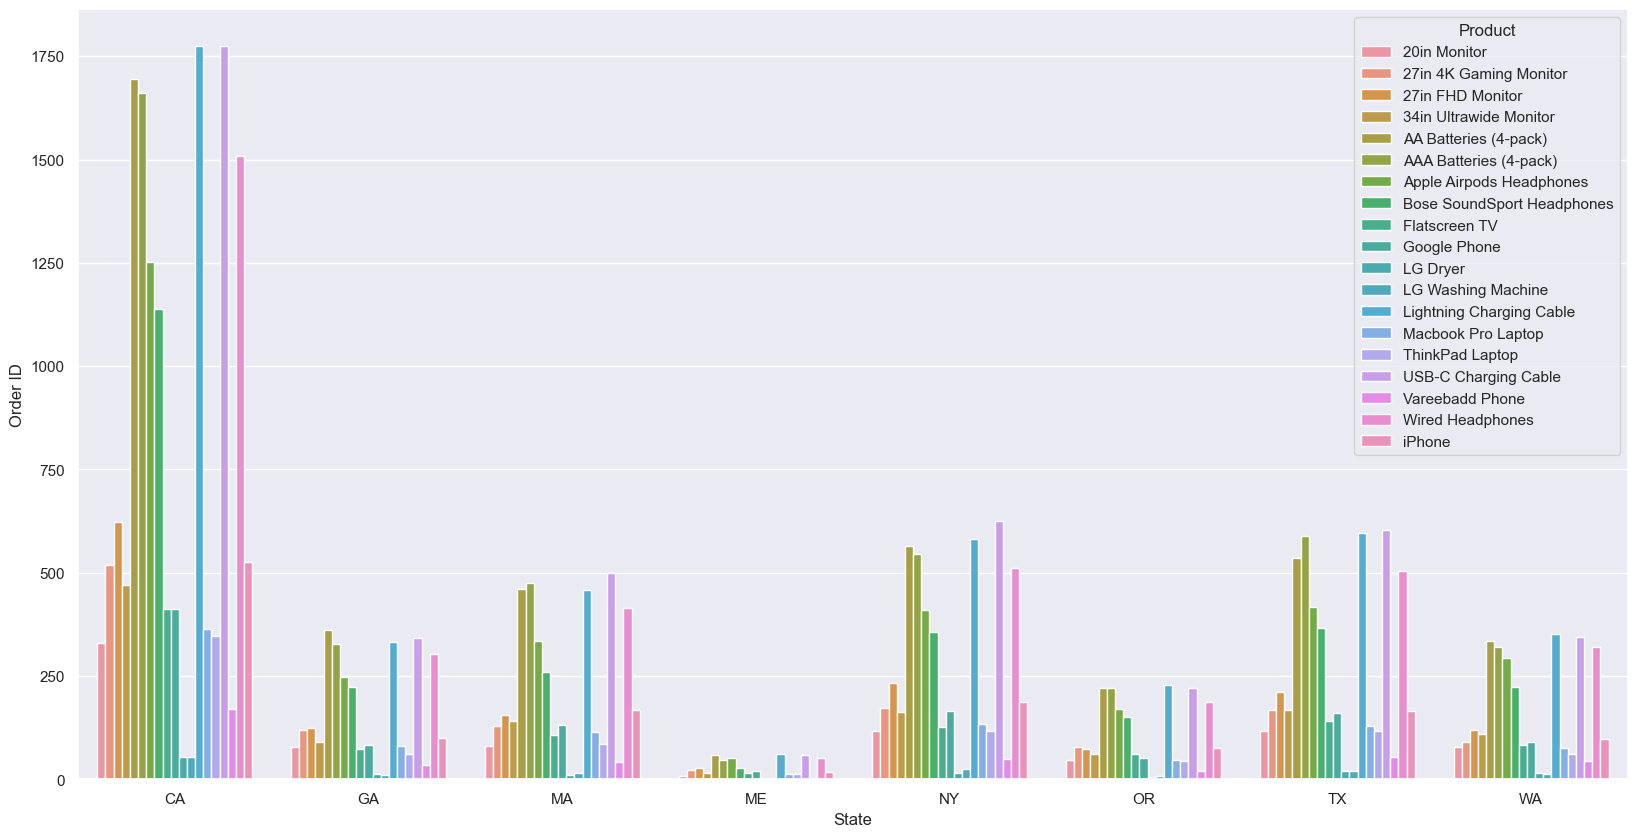

In [84]:
sns.barplot(
    data=sales_by_state.reset_index(),
    x = 'State',
    y = 'Order ID',
    hue = 'Product'
)

products sold by time

In [85]:
q3['time'].unique()

array([16,  8, 12, 10,  2, 18, 22, 13, 21,  4, 11, 20, 17, 19,  9, 23, 15,
        5, 14,  1,  0,  3,  7,  6], dtype=int64)

In [86]:
q3.groupby('time').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,month,year,Sales
time,,,,,,,,,,,
0,826,826,826,826,826,826,826,826,826,826,826
1,470,470,470,470,470,470,470,470,470,470,470
2,244,244,244,244,244,244,244,244,244,244,244
3,170,170,170,170,170,170,170,170,170,170,170
4,161,161,161,161,161,161,161,161,161,161,161
5,294,294,294,294,294,294,294,294,294,294,294
6,489,489,489,489,489,489,489,489,489,489,489
7,839,839,839,839,839,839,839,839,839,839,839
8,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288


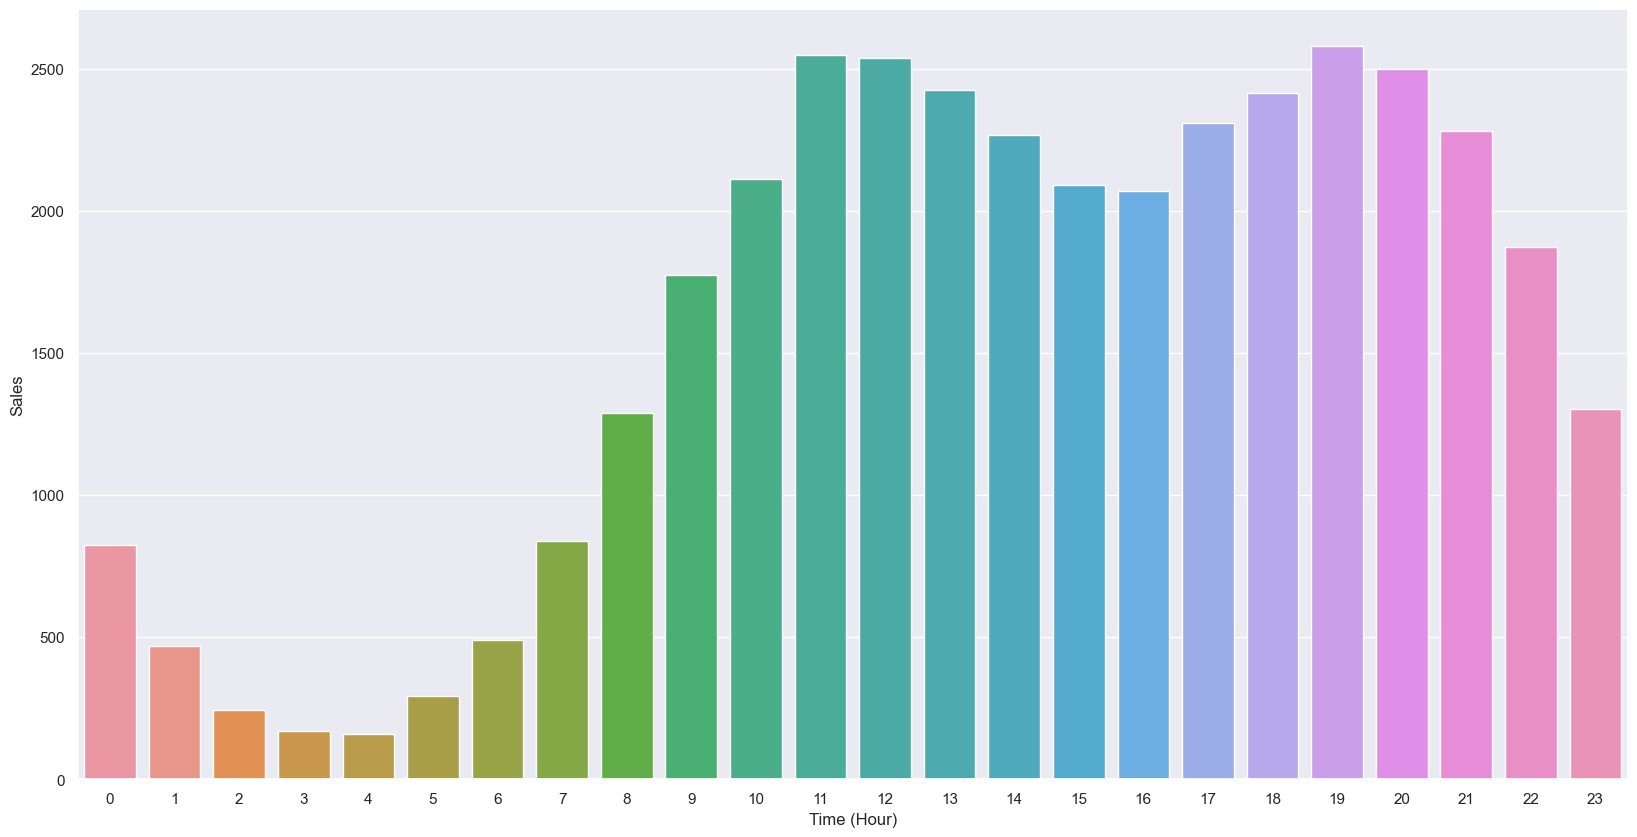

In [87]:
ax = sns.countplot(x=q3['time'])
ax.set(xlabel='Time (Hour)', ylabel='Sales')
plt.show()